In [1]:
%matplotlib notebook

In [2]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import plotly.express as px

In [3]:
wine_df = pd.read_csv('Wine_data1.csv', encoding="ISO-8859-1")

wine_df.head()

,Name,Rating,Winery,Area,Province,Country,Varietal,Vintage,Style,Wine Type,ID
0,IV,93.433789,Layor Wines,Nova Scotia,NaN,Canada,Vidal,2013,Dessert,White,55663e3e942360030000000e
1,Layor Gold,90.627673,Layor Wines,Nova Scotia,NaN,Canada,Vidal,2013,Dessert,White,55663e00942360030000000d
2,The Evangelist - Late Harvest Viognier,89.971973,Ascension Cellars,Central Coast,CA,USA,Viognier,2012,Dessert,White,5564efe1b4f0c10300000058
3,Soul Shaker,89.506316,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Petit Verdot, Syrah, Merlot",2012,NaN,Red,5564efe1b4f0c1030000009c
4,"Dalliance ""GSMv""",89.421973,Ascension Cellars,Central Coast,CA,USA,"Grenache, Syrah, Mourvedre, Viognier",2011,NaN,Red,5564efe1b4f0c1030000009b


In [4]:
#Data Clanup

#Correcting United States to USA, Remove counties that don't exist

wine_df['Country'] = wine_df['Country'].replace({'United States': 'USA', 'California': 'USA', 'Franc': 'France', 'French': 'France'})

cleaned_df = wine_df.loc[(wine_df['Country'] != 'Blind') & (wine_df['Country'] != 'Macedonia')]

# cleaned2_df = cleaned_df.dropna(subset = ['Varietal'])

# len(cleaned_df) - len(cleaned_df.dropna(subset = ['Vintage']))

# cleaned_df['Vintage'].value_counts()

In [5]:
#Bar Chart of Countries with Average Rating

winery_count = cleaned_df.groupby('Country').count()['Winery']

wine_rating = cleaned_df.groupby('Country').mean()['Rating']

winery_count_df = pd.DataFrame({'Winery Count': winery_count})

wine_rating_df = pd.DataFrame({'Wine Rating': wine_rating})

top10_country = winery_count_df.nlargest(10, 'Winery Count') #10 largest by Winery Count

top10_rating = wine_rating_df.nlargest(10, 'Wine Rating')

merge_df = top10_country.merge(wine_rating_df, on = 'Country')

# top10_country.sort_values(by = 'Winery Count', ascending = False).plot(kind='bar', ylabel = 'Count of Wineries')

# wine_rating_df.plot(kind='line', secondary_y = True)

# plt.legend()

# plt.show()
merge_df.head(10)

,Winery Count,Wine Rating
Country,,
USA,4213,77.102442
Canada,2555,76.416850
France,1716,76.952722
Italy,1611,76.853060
Spain,588,76.671740
Australia,460,76.146005
Argentina,421,75.767816
Chile,311,75.813061
New Zealand,241,76.859121


In [6]:
### Vintage analysis

# create a df for nv vintages
only_nv_df = cleaned_df.loc[(cleaned_df["Vintage"] == "nv")]
# only_nv_df

# create a df for year vintages (add .copy() to avoid warning message)
only_year_df = cleaned_df.loc[(cleaned_df["Vintage"] != "nv")].copy()

# get list of years
list_of_vintages = only_year_df["Vintage"]

# turn list of strings into integers
only_year_df["Vintage"] = [int(i) for i in only_year_df["Vintage"]]
# only_year_df["Vintage"]

# get years 2010-2019
after_10_df = only_year_df.loc[(only_year_df["Vintage"] >= 2010)]
# after_10_df

# merge only_nv_df and after_10_df
my_vintages_df = pd.concat([only_nv_df, after_10_df])
# my_vintages_df["Vintage"].unique()

# group by country and vintage
my_vintages_grouped = my_vintages_df.groupby(["Country","Vintage"])

# get average ratings by country by vintage
vint_avg_rating = my_vintages_grouped.mean().reset_index()
vint_avg_rating

,Country,Vintage,Rating
0,Argentina,2010,74.455148
1,Argentina,2011,75.826321
2,Argentina,2012,75.711720
3,Argentina,2013,74.757662
4,Argentina,2014,75.494968
...,...,...,...
216,Uruguay,2013,75.631447
217,Uruguay,2014,79.903684
218,Uruguay,2015,75.536198
219,Uruguay,2016,77.474874


In [7]:
# get number of ratings
vint_count_rating = my_vintages_grouped.count()
# vint_count_rating

# get only country/vintage combos that have 100+ ratings
most_rated = vint_count_rating.loc[(vint_count_rating["Rating"] >= 50)]
most_rated

Name  Rating  Winery  Area  Province  Varietal  Style  \
Country     Vintage                                                          
Argentina   2012       72      72      72    65        13        71      0   
            2013      101     101     101    96         6       101      1   
            2014       51      51      51    50         4        51      0   
Australia   2012       72      72      72    66         2        71      0   
            2013       73      73      73    69         9        73      2   
Canada      2010       55      55      55    55        20        54     10   
            2011      143     143     143   141        57       140     18   
            2012      297     297     297   297       118       294     32   
            2013      328     328     328   327       103       327     23   
            2014      231     231     231   231        57       229     23   
            2015      207     207     207   207        34       207     16   
            2016      275     275     275   275        14       274     14   
            2017      355     355     355   353        19       351     16   
            2018      149     149     149   148        14       149      2   
            nv        435     435     435   407       228       417     92   
Chile       2012       65      65      65    61         1        65      0   
            2013       69      69      69    67         2        69      0   
France      2010       98      98      98    95         9        96      1   
            2011      175     175     175   169        22       171      3   
            2012      201     201     201   190        29       198      2   
            2013      198     198     198   196        19       195      0   
            2014      163     163     163   159        23       163      2   
            2015      135     135     135   125        39       133      1   
            2016       65      65      65    61        21        63      2   
            2017       82      82      82    73        36        81      1   
            nv        191     191     191   145        53       176     81   
Italy       2010      101     101     101    98         9       100      1   
            2011      153     153     153   147        15       151      4   
            2012      191     191     191   185        13       189      4   
            2013      242     242     242   235        22       241      4   
            2014      163     163     163   152        29       162      4   
            2015      122     122     122   117        42       122      7   
            2016      112     112     112    93        43       112     11   
            2017       80      80      80    72        33        80      3   
            2018       67      67      67    53        39        67      0   
            nv        214     214     214   194        18       206     50   
New Zealand 2013       56      56      56    52         2        55      0   
Spain       2011       67      67      67    65         5        67      2   
            2012       69      69      69    67         1        69      0   
            2013       64      64      64    63         3        63      0   
            nv         83      83      83    73        13        80     30   
USA         2010      212     212     212   211       116       211     19   
            2011      369     369     369   362       198       368     16   
            2012      723     723     723   710       304       721     29   
            2013      683     683     683   675       305       681     23   
            2014      422     422     422   418       191       422     11   
            2015      257     257     257   246       105       255      5   
            2016      247     247     247   237        60       247      3   
            2017      148     148     148   139        67       148      0   
            2018       88      88      88  

In [12]:
#make a bar graph
top_countries = ["Canada", "France", "Italy", "USA"]
vint_top_countries_df = vint_avg_rating.loc[(vint_avg_rating["Country"] == "Canada") |
                                           (vint_avg_rating["Country"] == "France") |
                                           (vint_avg_rating["Country"] == "Italy") |
                                           (vint_avg_rating["Country"] == "USA") |
                                           (vint_avg_rating["Country"] == "Spain") |
                                           (vint_avg_rating["Country"] == "Australia") |
                                           (vint_avg_rating["Country"] == "Argentina") |
                                           (vint_avg_rating["Country"] == "Chile") |
                                           (vint_avg_rating["Country"] == "New Zealand") |
                                           (vint_avg_rating["Country"] == "South Africa")]
# vint_top_countries_df

# # plot data
fig = px.line(vint_top_countries_df, x="Vintage", y="Rating", color="Country",
              title="Average Rating by Vintage for Top Ten Countries") 
fig.show()

In [15]:
if not os.path.exists("images"):
    os.mkdir("images")
fig.write_image("images/Vintage_Analysis.png")

In [10]:
cleaned_df.head()
# Put countries into a list for for loop (first to calculate the average wine ratings and then to use for Box Plot

top_country_list = ['USA','Canada', 'France', 'Italy','Spain','Australia','Argentina','Chile','New Zealand','South Africa']

# Create empty list to fill with wine ratings for plotting
wine_ratings = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in top_country_list: 
    wine_rate = cleaned_df.loc[cleaned_df["Country"]==x]["Rating"]
    
    # Locate the rows which contain wine for each of the top ten countries and get the wine ratings
    wine_ratings.append(wine_rate)
    
    # outlier formula should be here 
    quartiles = wine_rate.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print("----------")
    print(f"For {x}, the lower quartile of ratings is: {lowerq}")
    print(f"For {x}, the upper quartile of ratings is: {upperq}")
    print(f"For {x}, the interquartile range of ratings is: {iqr}")
    print(f"For {x}, the the median of ratings is: {quartiles[0.5]} ")
      
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier = wine_rate.loc[(wine_rate<lower_bound)|(wine_rate>upper_bound)].count()
    print(x + " has " + str(outlier) + " wine rating outliers.")



----------
For USA, the lower quartile of ratings is: 75.76894659999998
For USA, the upper quartile of ratings is: 78.94394659999999
For USA, the interquartile range of ratings is: 3.1750000000000114
For USA, the the median of ratings is: 78.01894659999999 
USA has 275 wine rating outliers.
----------
For Canada, the lower quartile of ratings is: 74.62205193999999
For Canada, the upper quartile of ratings is: 78.8439466
For Canada, the interquartile range of ratings is: 4.221894660000004
For Canada, the the median of ratings is: 77.86894659999999 
Canada has 106 wine rating outliers.
----------
For France, the lower quartile of ratings is: 75.87832159999999
For France, the upper quartile of ratings is: 78.99394659999999
For France, the interquartile range of ratings is: 3.1156249999999943
For France, the the median of ratings is: 78.21269659999999 
France has 158 wine rating outliers.
----------
For Italy, the lower quartile of ratings is: 75.96698640666666
For Italy, the upper quartil

<IPython.core.display.Javascript object>


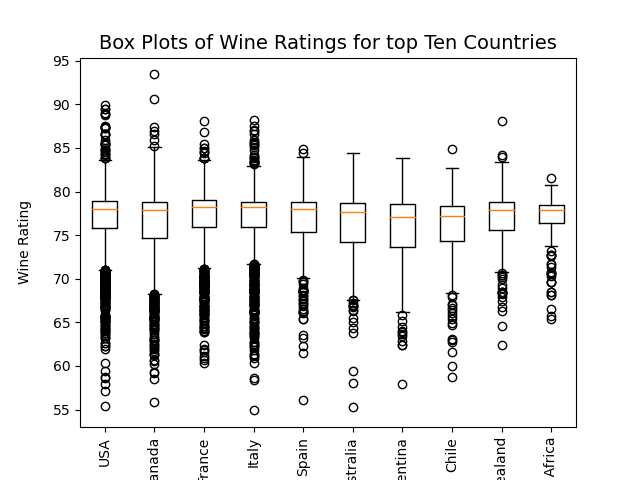

In [11]:
# Generate a box plot of all the wine ratings across the wineries in the top ten countries
plt.boxplot(wine_ratings)
plt.xlabel("Country", labelpad=15)
plt.ylabel("Wine Rating", labelpad=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10],['USA','Canada', 'France', 'Italy','Spain','Australia','Argentina','Chile','New Zealand','South Africa'],rotation="vertical")
plt.title("Box Plots of Wine Ratings for top Ten Countries", y=1, fontsize=14);
plt.show()

# There are a significant amount of outliers for each of the top countires skewing to the lower end of overall ratings